### Data Exploration 

In [1]:
#bringing in necessary libraries to start EDA
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score,precision_score,f1_score, confusion_matrix,roc_auc_score
from sklearn.multiclass import BaseEstimator
pd.set_option('display.max_columns', None)
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
path="../../Data/"
df = pd.read_csv('../../Data/training_set_values.csv',dtype={"permit":"string","public_meeting":"string"})
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

In [ ]:
df.head()

In [4]:
df.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

# Let us see what data types we are looking at and just a glance at which columns are missing values 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

# Now fine tuning the na values and results to a particular value

In [5]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

# Since we are working with many categories/classes I want to see how many columns I may have if I were to onehot encode the columns and which ones may not be needed.

In [6]:
df.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [7]:
df.funder.value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Hewawa                       1
Rv                           1
Siter Fransis                1
Wsdo                         1
Dacp                         1
Name: funder, Length: 1897, dtype: int64

In [8]:
df.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [9]:
df.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [10]:
df.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [11]:
df.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [12]:
df.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [13]:
df.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [14]:
df.amount_tsh.value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [15]:
df.num_private.value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

# Now that we look at our training data lets look at our training labels

In [16]:
target_df=pd.read_csv(path+'training_set_labels.csv')
target_df

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [17]:
target_df.status_group.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

# Overall our data is matching up row wise but we do have an imbalance with our functional needs repair which we may need to resolve.

In [18]:
from sklearn.preprocessing import LabelEncoder
sle = LabelEncoder()
status_encoded = sle.fit_transform(target_df['status_group'])
status_df=pd.DataFrame(status_encoded)
status_encoded_map = {index: label for index, label in 
                                       enumerate(sle.classes_)}

In [19]:
print(status_encoded_map) 

{0: 'functional', 1: 'functional needs repair', 2: 'non functional'}


In [20]:
status_df

,0
0,0
1,0
2,0
3,2
4,0
...,...
59395,0
59396,0
59397,0
59398,0


# Encoded our target variables

In [21]:
features_and_target=df.merge(target_df, how="inner", on="id")
features_and_target=features_and_target.fillna("unknown")
features_and_target["target"]=status_encoded
features_and_target=features_and_target.apply(LabelEncoder().fit_transform)
features_and_target

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,target
0,55621,62,47,1369,1448,1518,28151,5513,37399,0,1,11807,3,10,5,51,1426,109,1,0,7,2245,0,40,3,1,0,7,4,2,0,6,2,1,1,8,6,0,1,1,0,0
1,7021,0,309,469,1457,545,25572,53251,37195,0,4,15838,9,19,2,103,1576,276,2,0,2,2680,1,51,3,1,0,11,4,0,2,6,2,2,2,5,3,1,1,1,0,0
2,27491,13,300,825,744,2048,44703,38861,14572,0,5,9074,8,20,4,108,1624,247,1,0,7,2121,1,50,3,1,0,7,4,4,5,6,2,1,1,0,1,1,2,1,0,0
3,54138,0,272,1741,322,1852,50369,474,37285,0,7,8982,12,25,17,87,1571,58,1,0,7,2680,1,27,14,10,5,7,4,0,2,6,2,0,0,3,0,0,2,1,2,2
4,15816,0,104,20,59,119,4773,54519,35529,0,4,7698,4,17,1,26,1687,0,1,0,12,2680,1,0,3,1,0,1,1,0,2,6,2,3,3,5,3,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,48549,9,338,436,1268,201,42647,46389,513,0,5,5681,6,2,5,16,1090,125,1,0,10,1068,1,40,3,1,0,9,4,4,5,6,2,1,1,8,6,0,1,1,0,0
59396,21855,58,90,177,1270,265,29906,10949,24074,0,6,2980,3,10,4,91,353,56,1,0,7,479,1,37,3,1,0,7,4,2,0,6,2,1,1,6,4,1,1,1,0,0
59397,29696,0,75,1897,59,2131,20386,13840,27926,0,6,8784,10,11,7,59,177,0,1,0,7,2680,0,0,15,11,1,7,4,3,1,1,1,1,1,3,0,0,4,3,0,0
59398,25101,0,41,884,59,1213,33904,24205,29693,0,6,14012,2,0,4,11,1449,0,1,0,7,2680,1,0,8,5,1,7,4,0,2,6,2,2,2,7,5,0,4,3,0,0


In [22]:
X=features_and_target.drop(["target","status_group"],axis=1)
y=features_and_target["target"]
# features_and_target.drop(["target","status_group"],axis=1)

In [23]:
features_and_target

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,target
0,55621,62,47,1369,1448,1518,28151,5513,37399,0,1,11807,3,10,5,51,1426,109,1,0,7,2245,0,40,3,1,0,7,4,2,0,6,2,1,1,8,6,0,1,1,0,0
1,7021,0,309,469,1457,545,25572,53251,37195,0,4,15838,9,19,2,103,1576,276,2,0,2,2680,1,51,3,1,0,11,4,0,2,6,2,2,2,5,3,1,1,1,0,0
2,27491,13,300,825,744,2048,44703,38861,14572,0,5,9074,8,20,4,108,1624,247,1,0,7,2121,1,50,3,1,0,7,4,4,5,6,2,1,1,0,1,1,2,1,0,0
3,54138,0,272,1741,322,1852,50369,474,37285,0,7,8982,12,25,17,87,1571,58,1,0,7,2680,1,27,14,10,5,7,4,0,2,6,2,0,0,3,0,0,2,1,2,2
4,15816,0,104,20,59,119,4773,54519,35529,0,4,7698,4,17,1,26,1687,0,1,0,12,2680,1,0,3,1,0,1,1,0,2,6,2,3,3,5,3,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,48549,9,338,436,1268,201,42647,46389,513,0,5,5681,6,2,5,16,1090,125,1,0,10,1068,1,40,3,1,0,9,4,4,5,6,2,1,1,8,6,0,1,1,0,0
59396,21855,58,90,177,1270,265,29906,10949,24074,0,6,2980,3,10,4,91,353,56,1,0,7,479,1,37,3,1,0,7,4,2,0,6,2,1,1,6,4,1,1,1,0,0
59397,29696,0,75,1897,59,2131,20386,13840,27926,0,6,8784,10,11,7,59,177,0,1,0,7,2680,0,0,15,11,1,7,4,3,1,1,1,1,1,3,0,0,4,3,0,0
59398,25101,0,41,884,59,1213,33904,24205,29693,0,6,14012,2,0,4,11,1449,0,1,0,7,2680,1,0,8,5,1,7,4,0,2,6,2,2,2,7,5,0,4,3,0,0


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2020,test_size=.20)

In [25]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)


C:\Users\jstep\anaconda3\envs\Tanzania\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
logreg.score(X_test,y_test)

0.5502525252525252

In [27]:
y_hat =logreg.predict(X_test)

In [28]:
cm=confusion_matrix(y_test,y_hat,)
cm

array([[5698,    0,  656],
       [ 822,    0,   96],
       [3769,    0,  839]], dtype=int64)

Text(69.0, 0.5, 'true')

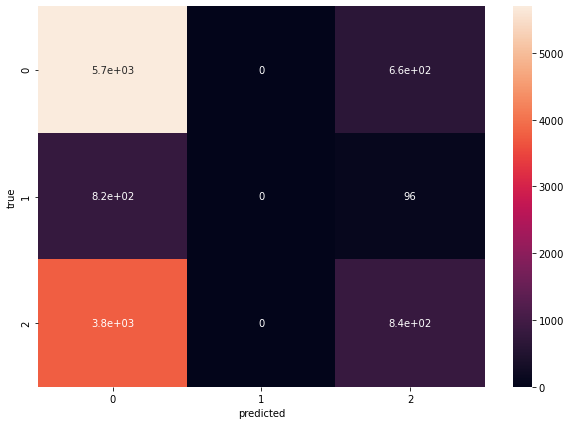

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("true")

In [30]:
dt= DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
y_hatdt=dt.predict(X_test)
cmdt=confusion_matrix(y_test,y_hatdt)
cmdt

array([[6162,    0,  192],
       [ 864,    0,   54],
       [2624,    0, 1984]], dtype=int64)

Text(69.0, 0.5, 'true')

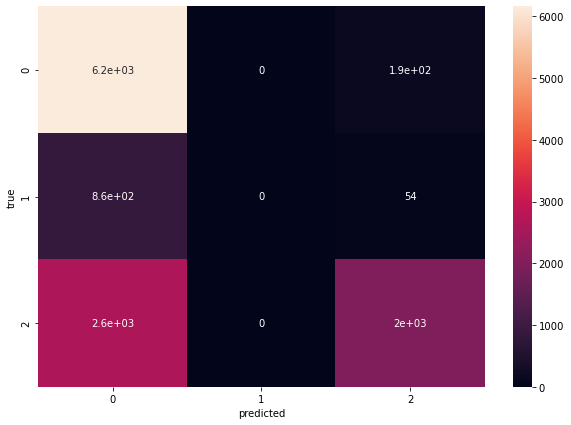

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(cmdt,annot=True)
plt.xlabel("predicted")
plt.ylabel("true")

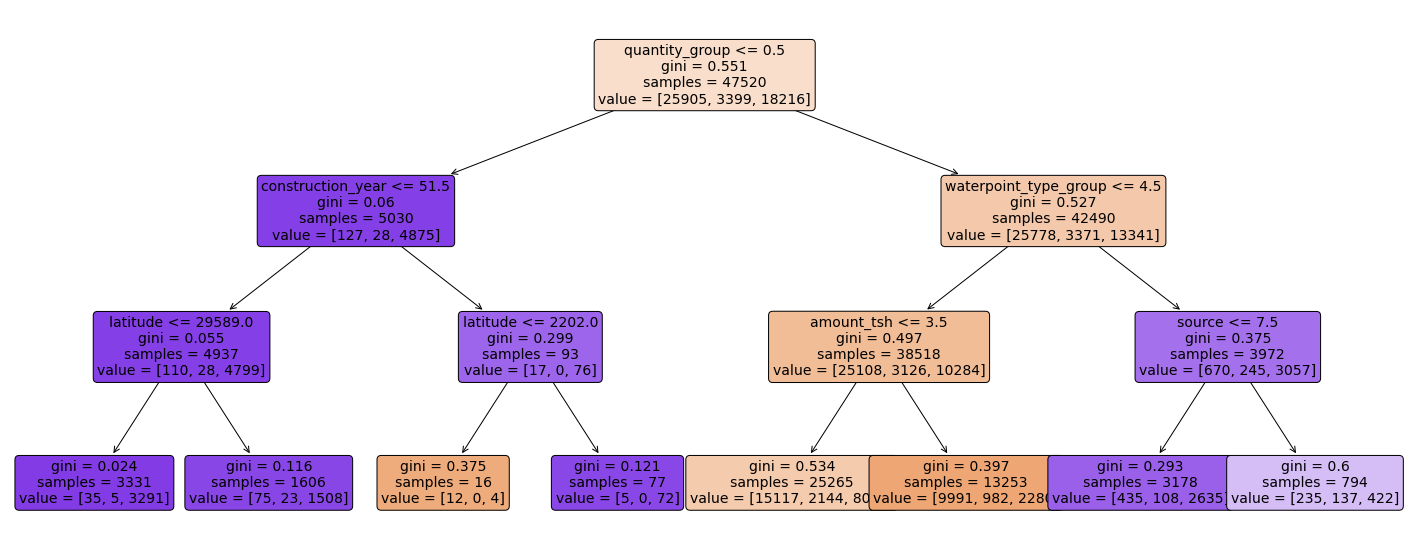

In [32]:
plt.figure(figsize=(25,10))
p=plot_tree(dt,feature_names=X_train.columns,filled=True,rounded=True, fontsize=14)

True is to the left. we will use this a basis for futher EDA.
